# First we would start off by importing all the libraries needed for the probelm at hand

In [55]:
import numpy as np    # a library used for calculation on arrays
import pandas as pd   # a library based on top of numpy and provides us with tools to work on dataframes
import seaborn as sns # based on top of matplotlib and helps us in visualizing various statistical parameters associated with the dataset
import sklearn        # the most novel library of all; most useful in machine learning algorithms

## Importing dataset; a file containing comma separated values

In [56]:
cars=pd.read_csv(r"D:\Asus\Videos\auto-mpg.csv")

In [180]:
cars.isnull()


,mpg,cyl,displ,hp,weight,accel,yr,x1,x2
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
387,False,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False,False
389,False,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False,False


In [182]:
cars[cars.isnull()].sum()


mpg       0.0
cyl       0.0
displ     0.0
hp        0.0
weight    0.0
accel     0.0
yr        0.0
x1        0.0
x2        0.0
dtype: float64

### No np.nan values in any column

### Finding various attributes about this file

In [80]:
print('TYPE of the file is', type(cars))
print('.....................................................................................................................................................')
print('Shape of the dataframe is', cars.shape)
print('.....................................................................................................................................................')
print('The data type of various column in the Dataframe are', cars.dtypes)
print('.....................................................................................................................................................')
print('Peasrson Correlation coefficient of each column with each other \n ', cars.corr())
print('.....................................................................................................................................................')
print('Head of the dataframe is \n', cars.head())
print('.....................................................................................................................................................')
print('Statistical Description of the dataframe is \n', cars.describe())
print('.....................................................................................................................................................')
print('Other useful nformation of the dataframe is \n', cars.info())




TYPE of the file is <class 'pandas.core.frame.DataFrame'>
.....................................................................................................................................................
Shape of the dataframe is (392, 9)
.....................................................................................................................................................
The data type of various column in the Dataframe are mpg       float64
cyl         int64
displ     float64
hp          int64
weight      int64
accel     float64
yr          int64
origin      int64
name       object
dtype: object
.....................................................................................................................................................
Peasrson Correlation coefficient of each column with each other 
               mpg       cyl     displ        hp    weight     accel        yr  \
mpg     1.000000 -0.777618 -0.805127 -0.778427 -0.832244  0.423329  0.580541   
c

## Time to see some useful Graphs

<AxesSubplot:xlabel='hp', ylabel='accel'>

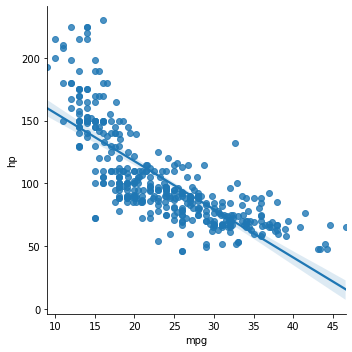

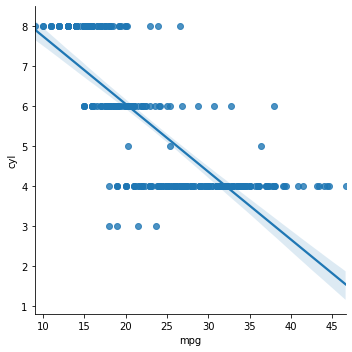

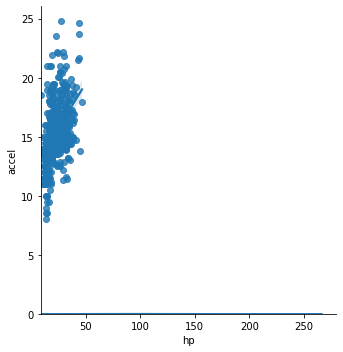

In [111]:
sns.lmplot(x='mpg', y='hp', data= cars)
sns.lmplot(x='mpg', y='cyl', data= cars)
sns.lmplot(x='mpg', y='accel', data= cars)


<AxesSubplot:xlabel='hp'>

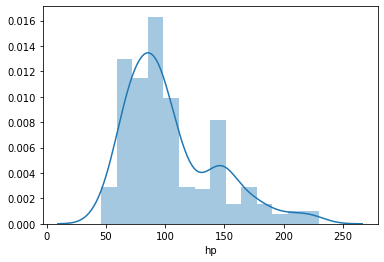

In [116]:
sns.distplot(cars['hp'])

<AxesSubplot:xlabel='name', ylabel='weight'>

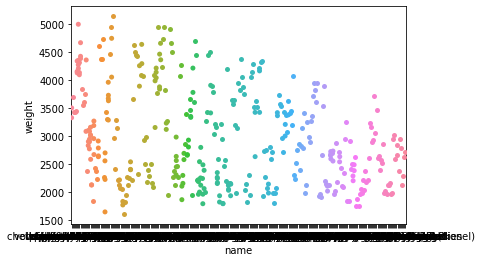

In [115]:
sns.stripplot(cars['name'], cars['weight'])

<AxesSubplot:xlabel='name', ylabel='count'>

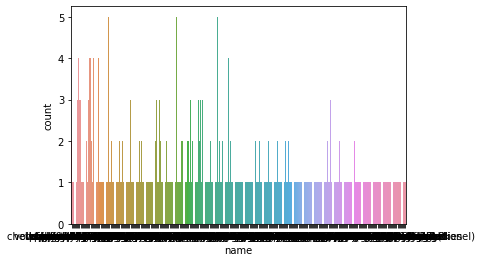

In [120]:
sns.countplot(cars['name'])



<AxesSubplot:xlabel='origin', ylabel='count'>

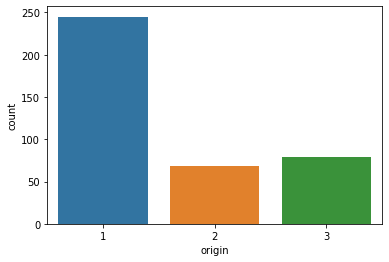

In [121]:
sns.countplot(cars['origin'])

### Grouping cars by the number of cylinders each one has and finding out mean/median

In [126]:
cars.groupby('cyl').mean()

,mpg,displ,hp,weight,accel,yr,origin
cyl,,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,29.283920,109.670854,78.281407,2305.110553,16.581910,77.030151,2.000000
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,19.973494,218.361446,101.506024,3202.120482,16.254217,75.951807,1.192771
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


In [127]:
cars.groupby('cyl').median()

,mpg,displ,hp,weight,accel,yr,origin
cyl,,,,,,,
3,20.25,70.0,98.5,2375.0,13.5,75.0,3.0
4,28.40,105.0,78.0,2230.0,16.2,77.0,2.0
5,25.40,131.0,77.0,2950.0,19.9,79.0,2.0
6,19.00,231.0,100.0,3210.0,16.0,76.0,1.0
8,14.00,350.0,150.0,4140.0,13.0,73.0,1.0


### Finding out cars whose mpg is below 10

In [128]:
cars[cars['mpg']<10]

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d


### Finding out cars with mpg more than 40

In [132]:
cars[cars['mpg']>40]

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
242,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
307,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
320,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
322,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
323,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
324,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
327,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


### Finding out the outliers

In [142]:
the_25_percentile=cars['weight'].quantile(.25)
the_75_percemtile=cars['weight'].quantile(.75)

inter_quartile_range= the_75_percemtile-the_25_percentile
para1=the_25_percentile-1.5*inter_quartile_range
para2=the_25_percentile-1.5*inter_quartile_range
outliers=cars[(cars['weight']< para1) & (cars['weight']> para2)]

In [143]:
outliers

,mpg,cyl,displ,hp,weight,accel,yr,origin,name


#### No such outlier found. Similar analysis can be done by plotting a boxplot

<AxesSubplot:xlabel='weight'>

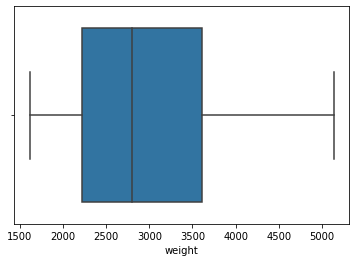

In [153]:
sns.boxplot(cars['weight'])

#### Similarly for others:


<AxesSubplot:xlabel='mpg'>

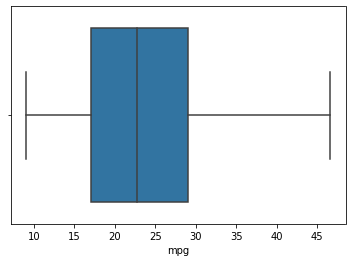

In [156]:
sns.boxplot(cars['mpg'])


<AxesSubplot:xlabel='cyl'>

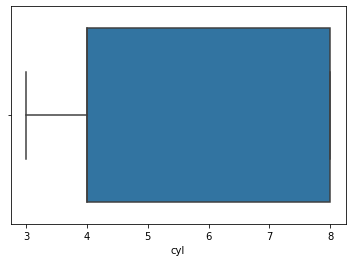

In [157]:
sns.boxplot(cars['cyl'])

## Visualizing correlations:

<AxesSubplot:xlabel='displ', ylabel='mpg'>

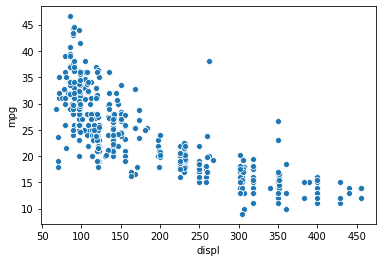

In [158]:
sns.scatterplot(cars['displ'],cars['mpg'])

#### A negative correlation can be seen; which can be confirmed by the correlation coefficient between the two

In [159]:
cars['displ'].corr(cars['mpg'])

-0.8051269467104581

#### A strong negative correlation indeed

## Importing a special library called pyforest to make the importing task less tedious

In [160]:
from pyforest import *
lazy_imports()

['from sklearn.manifold import TSNE',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import Lasso',
 'import dash',
 'import numpy as np',
 'import bokeh',
 'from sklearn.model_selection import cross_val_score',
 'import lightgbm as lgb',
 'from PIL import Image',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.decomposition import PCA',
 'import tensorflow as tf',
 'import nltk',
 'import spacy',
 'import awswrangler as wr',
 'import sys',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import statsmodels.api as sm',
 'from scipy import stats',
 'import torch',
 'from dask import dataframe as dd',
 'import fastai',
 'import pickle',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.linear_model import ElasticNetCV',
 'import fbprophet',
 'import textblob',
 'import pydot',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.model_selection import StratifiedKFold'

# Coming to Linear Regression

 ### changing the origin to categorical variables

In [161]:
x=pd.get_dummies(cars['origin'])

<IPython.core.display.Javascript object>

In [162]:
x

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
387,1,0,0
388,0,1,0
389,1,0,0
390,1,0,0


In [167]:
cars['x1']=x.iloc[:,0]

In [169]:
cars['x2']=x.iloc[:,1]

In [170]:
cars['x3']=x.iloc[:,2]

In [171]:
cars

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,x1,x2,x3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0,1,0
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1,0,0


## Dropping the origin column now:

In [172]:
cars.drop('origin', axis=1, inplace= True)

In [173]:
cars

,mpg,cyl,displ,hp,weight,accel,yr,name,x1,x2,x3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,1,0
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


## Make too won't have any affect on the mpg of the car, so dropping that too.
### Also dropping the x3 column to avoid dummy trap

In [178]:
cars.drop('x3', axis=1, inplace= True)

## Now the Cars dataset looks like:

In [179]:
cars

,mpg,cyl,displ,hp,weight,accel,yr,x1,x2
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0
388,44.0,4,97.0,52,2130,24.6,82,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0
390,28.0,4,120.0,79,2625,18.6,82,1,0


## To predict mpg, we have 8 independent variables

In [186]:
# creating x and y variables:
x=cars.iloc[:,1:]
y=cars.iloc[:,0]

In [187]:
x

,cyl,displ,hp,weight,accel,yr,x1,x2
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,0
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,0
4,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1,0
388,4,97.0,52,2130,24.6,82,0,1
389,4,135.0,84,2295,11.6,82,1,0
390,4,120.0,79,2625,18.6,82,1,0


In [188]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

## Splitting x and y in train and test samples

In [189]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

<IPython.core.display.Javascript object>

In [192]:
x_train

,cyl,displ,hp,weight,accel,yr,x1,x2
263,8,318.0,140,4080,13.7,78,1,0
10,8,383.0,170,3563,10.0,70,1,0
68,8,350.0,160,4456,13.5,72,1,0
48,4,122.0,86,2220,14.0,71,1,0
188,8,351.0,152,4215,12.8,76,1,0
...,...,...,...,...,...,...,...,...
73,8,302.0,140,4294,16.0,72,1,0
152,6,250.0,72,3432,21.0,75,1,0
249,8,302.0,139,3570,12.8,78,1,0
85,8,304.0,150,3672,11.5,73,1,0


In [193]:
 x_test

,cyl,displ,hp,weight,accel,yr,x1,x2
277,4,98.0,68,2135,16.6,78,0,0
238,4,97.0,78,2190,14.1,77,0,1
53,4,72.0,69,1613,18.0,71,0,0
169,4,134.0,96,2702,13.5,75,0,0
130,4,140.0,75,2542,17.0,74,1,0
...,...,...,...,...,...,...,...,...
19,4,97.0,46,1835,20.5,70,0,1
326,4,146.0,67,3250,21.8,80,0,1
339,4,79.0,58,1755,16.9,81,0,0
351,4,108.0,75,2350,16.8,81,0,0


In [194]:
y_train

263    17.5
10     15.0
68     12.0
48     23.0
188    14.5
       ... 
73     13.0
152    15.0
249    20.2
85     14.0
297    27.2
Name: mpg, Length: 313, dtype: float64

In [196]:
y_test

277    29.5
238    30.5
53     35.0
169    24.0
130    25.0
       ... 
19     26.0
326    30.0
339    39.1
351    32.4
292    34.1
Name: mpg, Length: 79, dtype: float64

## Creating a linear regression object after importing the module

In [204]:
from sklearn import linear_model
ob1=linear_model.LinearRegression()
#Fitting the object with x_train and y_train
ob1.fit(x_train, y_train)

LinearRegression()

In [205]:
# Now converting the x_test and y_test to numpy arrays

In [208]:
x_test_arr=np.array(x_test).reshape(79,8)
y_test_arr=np.array(y_test).reshape(79,1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Predicting the y value/ mpg

In [212]:
y_pred=ob1.predict(x_test_arr)

### Getting score of prediction:

In [210]:
ob1.score(x_test_arr,y_test_arr)

0.8228310491141875

### Reasonable accuracy for Linear Regression

## Creating Visualisations to see the residual pattern using residplot from seaborn

<IPython.core.display.Javascript object>

<AxesSubplot:>

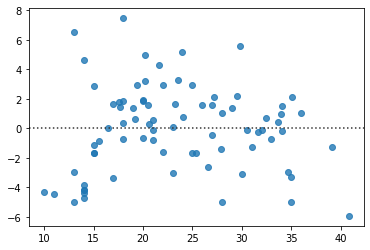

In [213]:
sns.residplot(y_test_arr, y_pred)

<IPython.core.display.Javascript object>

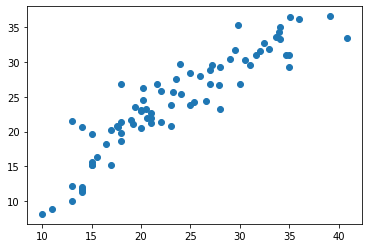

In [216]:
plt.scatter(y_test_arr, y_pred)

In [217]:
# getting the coefficient and slope of the estimated line

In [220]:
print(ob1.coef_)
print(ob1.intercept_)

[-0.3630046   0.02458372 -0.01208591 -0.00733948  0.07291283  0.80975214
 -2.57368825  0.09658062]
-17.13829113789512


In [224]:
for i, j in enumerate(cars.columns[1:]):
    print('The coefficient corresponding to {} is {}'.format(j,ob1.coef_[i]))

The coefficient corresponding to cyl is -0.36300460387772526
The coefficient corresponding to displ is 0.024583723086382115
The coefficient corresponding to hp is -0.012085914809402782
The coefficient corresponding to weight is -0.007339475820637469
The coefficient corresponding to accel is 0.07291283071615635
The coefficient corresponding to yr is 0.8097521387178164
The coefficient corresponding to x1 is -2.5736882500568474
The coefficient corresponding to x2 is 0.09658062220743172
